In [1]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
from IPython.display import display
from PIL import ImageFont, ImageDraw, Image

In [159]:
def createImage(name, fontpath, fontSize):
    blank = np.zeros((100, 500, 3), dtype='uint8')
    blank[:] = 255,255,255
    
    font = ImageFont.truetype(fontpath, fontSize)
    img_pil = Image.fromarray(blank)
    draw = ImageDraw.Draw(img_pil)
    w, h = draw.textsize(name, font = font)
    draw.text(((500-w)/2,(100-h)/2), name, font = font, fill = (0, 0, 0))
    return np.array(img_pil)

In [2]:
blank = np.zeros((100, 500, 3), dtype='uint8')
blank[:] = 255,255,255

In [109]:
fontpath = "./fonts/4u-Malith.ttf"     
font = ImageFont.truetype(fontpath, 60)
img_pil = Image.fromarray(blank)
draw = ImageDraw.Draw(img_pil)
w, h = draw.textsize('wxlvf.a', font = font)
draw.text(((500-w)/2,(100-h)/2), "wxlvf.a", font = font, fill = (0, 0, 0))
image = np.array(img_pil)

In [111]:
import random

def sp_noise(image,prob):
    '''
    Add salt and pepper noise to image
    prob: Probability of the noise
    '''
    output = np.zeros(image.shape,np.uint8)
    thres = 1 - prob 
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            rdn = random.random()
            if rdn < prob:
                output[i][j] = 0
            elif rdn > thres:
                output[i][j] = 255
            else:
                output[i][j] = image[i][j]
    return output

In [112]:
noisyText = sp_noise(image, 0.05)

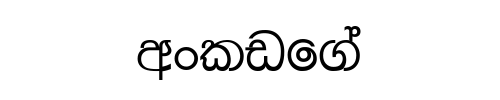

In [113]:
display(Image.fromarray(image))

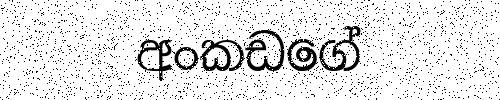

In [114]:
display(Image.fromarray(noisyText))

In [119]:
def gaussianBlur(image, kernalSize, x, y, s):
    blurred_img = cv.GaussianBlur(image, kernalSize, 0)
    mask = np.zeros(image.shape, dtype=np.uint8)
    mask = cv.rectangle(mask, (x, y), (x + 30, y + 30), (255, 255,255), -1)
    out = np.where(mask!=np.array([255, 255, 255]), image, blurred_img)
    return out


In [118]:
image.shape

(100, 500, 3)

In [116]:
blurred_img = cv.GaussianBlur(image, (11, 11), 0)

mask = np.zeros((100, 500, 3), dtype=np.uint8)
# mask = cv.circle(mask, (100, 100), 100, (255, 255,255), -1)
mask = cv.rectangle(mask, (250, 50), (280, 80), (255, 255,255), -1)

out = np.where(mask!=np.array([255, 255, 255]), image, blurred_img)

In [157]:
s = 30
x,  y = random.randint((image.shape[1] - w)//2, (image.shape[1] + w)//2 - s), random.randint((image.shape[0] - h)//2, (image.shape[0] + h)//2 - s)
out = gaussianBlur(image, (11, 11), x, y, s)

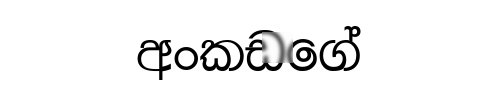

In [158]:
display(Image.fromarray(out))

In [165]:
names = open(r'D:\Final Year Project\Codes\Unicode to Legacy\legacy.txt', 'r', encoding='utf-8').readlines()
for line in names:
    unicodeName, legacyName = line.strip().split('\t')
    image = createImage(legacyName, './4u-Malith.ttf', 60)
    noisyImage = sp_noise(image, 0.05)
    s = 30
    x,  y = random.randint((image.shape[1] - w)//2, (image.shape[1] + w)//2 - s), random.randint((image.shape[0] - h)//2, (image.shape[0] + h)//2 - s)
    bluredImage = gaussianBlur(noisyImage, (11, 11), x, y, s)
    cv.imwrite(f'out/{unicodeName}.jpg', bluredImage)

KeyboardInterrupt: 